## **Question 1: Exploratory Data Analysis and Preprocessing**

### **Objective**  
In this question, you will conduct a structured exploratory data analysis (EDA) and preprocess the **Wine Quality Dataset** to prepare it for downstream analysis. This includes computing **summary statistics**, detecting and removing **outliers using Mahalanobis distance**, applying **feature normalization**, and performing **dimensionality reduction with PCA**. Throughout, you will be required to analyze your results and justify your methodological choices.

- **Dataset:** [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)  
- **Focus Areas:** Algorithm analysis, data interpretation, and preprocessing strategies.

### **Part 1: Summary Statistics (5 Points)**
#### **Instructions:**
1. Load the **Wine Quality Dataset** and inspect its structure (e.g., feature types, missing values, summary statistics).  

**Answer**: Code for this in "Loading in dataset" down below.

2. Compute the following descriptive statistics for each feature, both overall and grouped by wine quality rating:
   - Minimum, Maximum
   - Mean, Trimmed Mean (5%)
   - Standard Deviation
   - Skewness, Kurtosis  

**Answer**: Code for this down in code cell below "Loading in the dataset."

3. Present results in a **clear table**.  

**Answer**: In same code cell as question 2.

4. Provide a written **interpretation** of what these statistics reveal about the dataset.  

**Answer**:  
The descriptive statistics grouped by wine quality rating provide valuable insights into how the properties of wine relate to perceived quality. Across most features, the close alignment between the mean and 5% trimmed mean indicates that the data is relatively robust to outliers, with most distributions being stable and not heavily skewed by extreme values. However, some features, such as residual sugar, total sulfur dioxide, and alcohol content, show higher standard deviations, reflecting greater variability within each quality group. This means that while these attributes may play a role in wine quality, they vary widely even among wines rated similarly and should not necessarly be taken into consideration.  

A pattern does emerge in alcohol and volatile acidity. Higher-quality wines have higher average alcohol content based on the dataset. On the other hand, volatile acidity tends to decrease as wine quality increases. This inverse relationship is consistent across multiple quality levels, reinforcing its importance as a negative indicator of wine quality.  

Other features, such as sulphates and citric acid, show a slight upward trend with quality, suggesting a minor but positive relationship in wine quality. In contrast, attributes like residual sugar and chlorides display minimal variation across quality ratings, indicating that they are less influential in determining wine quality in this dataset.  

It is also important to note that the lowest and highest quality ratings often contain very few samples. This limited sample size leads to zero standard deviations in some statistics and unstable values for skewness and kurtosis. 

In summery, the descriptive statistics reveal that alcohol content and volatile acidity are the most consistently informative features for distinguishing wine quality, while others either contribute marginally or exhibit variability that weakens their direct interpretability. 

#### **Deliverables:**
- Code implementation for computing summary statistics. (Done, code below)
- A table summarizing computed values. (Done, code below)
- A written analysis of key insights. (Done, analysis of key insights in question 4 answer)

#### **Loading in the dataset**

In [1]:
import pandas as pd

# Load red and white wine datasets from UCI Machine Learning Repository
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'
df_wine = pd.concat([df_red, df_white], axis=0, ignore_index=True)

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### **Calculation of Minimum, Maximum, Mean, Trimmed Mean (5%), Standard Deviation, Skewness, Kurtosis**

In [2]:
from scipy.stats import trim_mean, skew, kurtosis
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Helper function to compute trimmed mean with 5% trim
def trimmed_mean(x):
    return trim_mean(x, proportiontocut=0.05)

#Select only numeric features (excluding 'wine_type')
numeric_features = df_wine.select_dtypes(include='number').columns

#Group by 'quality' and compute the stats
grouped_stats = df_wine.groupby('quality')[numeric_features].agg(
    ['min', 'max', 'mean', trimmed_mean, 'std', skew, kurtosis]
)

#Optionally flatten multi-level column index for readability
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]

#Display the resulting DataFrame
grouped_stats.head()

,fixed acidity_min,fixed acidity_max,fixed acidity_mean,fixed acidity_trimmed_mean,fixed acidity_std,fixed acidity_skew,fixed acidity_kurtosis,volatile acidity_min,volatile acidity_max,volatile acidity_mean,...,alcohol_std,alcohol_skew,alcohol_kurtosis,quality_min,quality_max,quality_mean,quality_trimmed_mean,quality_std,quality_skew,quality_kurtosis
quality,,,,,,,,,,,,,,,,,,,,,
3,4.2,11.8,7.853333,7.842857,1.747853,0.575630,0.052246,0.17,1.580,0.517000,...,1.106497,0.119180,-0.273552,3,3,3.0,3.0,0.0,NaN,NaN
4,4.6,12.5,7.288889,7.220918,1.264825,1.089124,1.849911,0.11,1.130,0.457963,...,0.985923,0.678283,0.124119,4,4,4.0,4.0,0.0,NaN,NaN
5,4.5,15.9,7.326801,7.227362,1.260002,1.731955,5.750496,0.10,1.330,0.389614,...,0.814416,1.240285,2.041203,5,5,5.0,5.0,0.0,NaN,NaN
6,3.8,14.3,7.177257,7.058614,1.291191,1.743160,4.667880,0.08,1.040,0.313863,...,1.126491,0.421034,-0.604936,6,6,6.0,6.0,0.0,NaN,NaN
7,4.2,15.6,7.128962,7.002210,1.372141,1.928725,5.853111,0.08,0.915,0.288800,...,1.199337,-0.294529,-0.460489,7,7,7.0,7.0,0.0,NaN,NaN


### **Part 2: Data Visualization (5 Points)**
#### **Instructions:**
1. Create **scatter plots or pair plots** to visualize relationships between two numerical features and wine quality.  

**Answer**: Code for this is in first cell below.  

2. Identify any **patterns, trends, or clusters** in the data.  

**Answer**: Looking at the plots, there is a clear pattern and common trend in both sets.  

**Alcohol vs Wine Quality**:
There is a visible upward trend in alcohol content as wine quality increases, particularly from quality ratings 3 through 7. This suggests that, generally, higher alcohol content is associated with better wine quality. However, beyond quality 7, the trend becomes less consistent. Quality levels 8 and 9 show alcohol values mostly within the same range as quality 7. This inconsistency is likely due to the relatively small number of samples for the highest quality ratings, which introduces more noise and less statistical reliability. As a result, while alcohol content is clearly related to quality up to a point, it does not appear to be the sole driver of ratings at the high end.  

**Volitile Acidity vs Quality**:  
This relationship displays a more consistent and interpretable trend. Volatile acidity tends to decrease as wine quality increases. Lower acidity is a strong marker of higher quality across nearly all quality levels. Wines with the highest quality ratings have the lowest levels of volatile acidity and this pattern holds even with fewer data points in those higher categories.  

3. Discuss whether **certain features appear to separate wine quality levels** more effectively.  

**Answer**: Certain features do appear to separate wine quality levels more effectively than others. Alcohol content shows a clear upward trend with increasing quality up to a point, making it a strong differentiator for mid-range qualities. Volatile acidity is even more consistent, with higher-quality wines showing noticeably lower acidity levels across nearly all quality ratings. In contrast, features like residual sugar and chlorides show little variation across quality levels (from earlier table), suggesting they are less effective at distinguishing between wine qualities in this dataset.

#### **Deliverables:**
- Code for generating visualizations. (Done, code below)
- A written discussion of key observations. (Done, discussions in answers for questions 2 and 3)

#### **Scatter plots for Alcohol vs Quality and Colitile Acidity vs Quality**

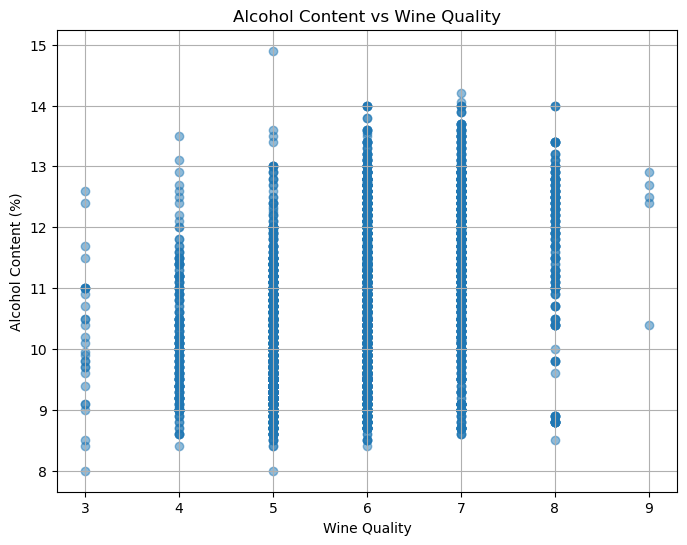

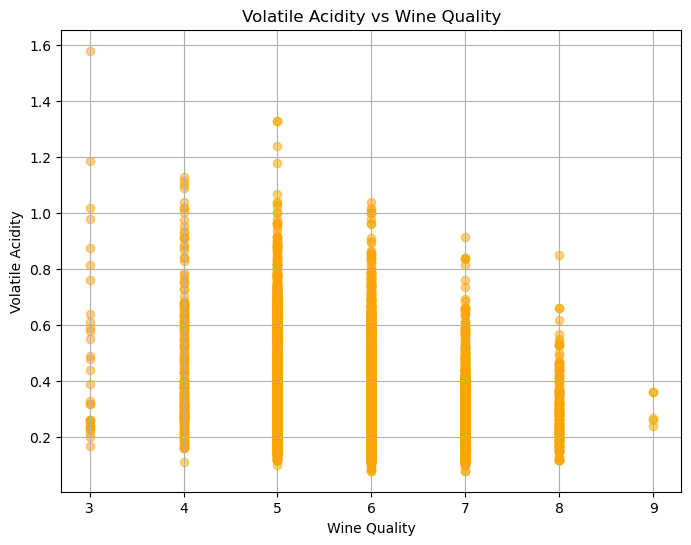

In [3]:
import matplotlib.pyplot as plt

#Scatter plot: Alcohol vs Quality
plt.figure(figsize=(8, 6))
plt.scatter(df_wine['quality'], df_wine['alcohol'], alpha=0.5)
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content (%)')
plt.grid(True)
plt.show()

#Scatter plot: Volatile Acidity vs Quality
plt.figure(figsize=(8, 6))
plt.scatter(df_wine['quality'], df_wine['volatile acidity'], alpha=0.5, color='orange')
plt.title('Volatile Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.grid(True)
plt.show()

### **Part 3: Outlier Detection and Removal using Mahalanobis Distance (5 Points)**
#### **Instructions:**
1. **Use the provided pairwise ellipse plot method** (which builds on the Mahalanobis distance) to assess outliers in the dataset.  

**Answer**: Code for this provided below.   

2. Select **at least three distinct feature pairs** for visualization.  

**Answer**: Pairs selected are Alcohol vs Quality, Volitile Acidity vs Citric Acid and Residual Sugar vs Density. Code with visualization in first code cell.  

3. Develop a **numerical outlier metric** based on Mahalanobis distance to systematically identify extreme values.  

**Answer**: Code for this in cell below "computing mahalanobis distance for outlier detection."  

4. Implement an **algorithm that removes observations identified as outliers** based on this metric.  

**Answer**: Code for this in cell below "removal of outliers baced on threshold."  

5. Justify the **choice of threshold** for outlier removal and explain why Mahalanobis distance is appropriate for multivariate data.  

**Answer**: The threshold was set at the 99.7% confidence level, corresponding to observations that lie beyond 3 standard deviations from the multivariate mean. This is a common statistical cutoff for identifying extreme values while preserving the integrity of the dataset. For use in multivariante data, the Mahalanobis distance is well-suited because it accounts for correlations between variables and scales distances relative to the data’s covariance structure. Unlike Euclidean distance, it properly identifies outliers in high-dimensional feature space, even when individual features appear normally distributed. As a result, approximately 3.4% of the dataset was identified and removed as outliers, reflecting a reasonable number for robust cleaning without overly distorting the underlying data distribution.  

#### **Deliverables:**
- Code implementing the outlier detection and removal algorithm. (Done, code below)
- Pairwise ellipse plots for at least three feature pairs. (Done, code below)
- A written explanation of the metric used for outlier detection and removal, including justification of the threshold. (Done, written answer for 5)  

#### **Code for pairwise ellipse: Alcohol vs Qualtiy; Volitile Acidity vs Citric Acid; Residual Sugar vs Density**

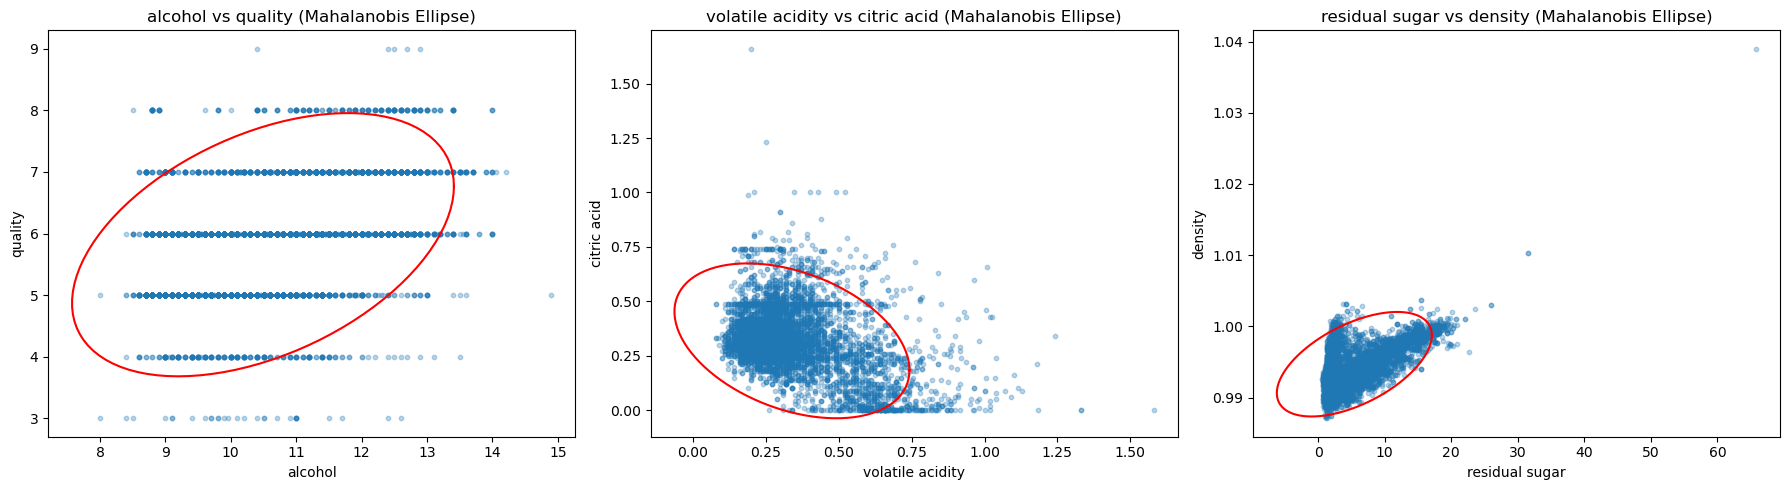

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from numpy.linalg import inv

#Function to plot Mahalanobis ellipse
def plot_mahalanobis_ellipse(data, x_col, y_col, ax, confidence=0.95):
    X = data[[x_col, y_col]].dropna().values
    mean = np.mean(X, axis=0)
    cov = np.cov(X.T)
    inv_cov = inv(cov)

    #Mahalanobis radius
    radius = np.sqrt(chi2.ppf(confidence, df=2))

    #Parametric ellipse
    theta = np.linspace(0, 2 * np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])
    ellipse = mean[:, None] + radius * np.linalg.cholesky(cov) @ circle

    #Scatter and ellipse
    ax.scatter(X[:, 0], X[:, 1], alpha=0.3, s=10)
    ax.plot(ellipse[0], ellipse[1], color='red')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col} (Mahalanobis Ellipse)')

#Create subplots for each feature pair
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_mahalanobis_ellipse(df_wine, 'alcohol', 'quality', axes[0])
plot_mahalanobis_ellipse(df_wine, 'volatile acidity', 'citric acid', axes[1])
plot_mahalanobis_ellipse(df_wine, 'residual sugar', 'density', axes[2])

plt.tight_layout()
plt.show()

#### **Computing Mahalanobis Distance for outlier detection**

In [5]:
import numpy as np
from scipy.stats import chi2
from numpy.linalg import inv

#Select only numeric features (excluding 'wine_type')
X = df_wine.select_dtypes(include='number').copy()

#Compute Mahalanobis distance
mean_vec = X.mean().values
cov_matrix = np.cov(X.T)
inv_cov_matrix = inv(cov_matrix)

def mahalanobis_dist(row):
    delta = row - mean_vec
    return np.sqrt(delta @ inv_cov_matrix @ delta.T)

X['mahalanobis'] = X.apply(mahalanobis_dist, axis=1)

#### **Removal of outliers based on threshold**

In [6]:
#Set threshold (99.7% confidence)
threshold = np.sqrt(chi2.ppf(0.997, df=X.shape[1] - 1))  # subtract 1 to exclude 'quality'

#Identify outliers
outliers = X['mahalanobis'] > threshold

#Drop outliers from original dataframe
df_wine_no_outliers = df_wine.loc[~outliers].reset_index(drop=True)

df_wine_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### **Checking percentage of data removed based on above process**

In [7]:
#Dimensions of original dataset
original_shape = df_wine.shape
cleaned_shape = df_wine_no_outliers.shape

#Calculate number of rows removed
rows_removed = original_shape[0] - cleaned_shape[0]
percent_removed = (rows_removed / original_shape[0]) * 100

print(f"Number of rows removed: {rows_removed}")
print(f"Percentage of data removed: {percent_removed:.2f}%")

Number of rows removed: 223
Percentage of data removed: 3.43%


### **Part 4: Feature Scaling and Normalization (5 Points)**
#### **Instructions:**
1. Apply **Min-Max Normalization** to scale all numerical features between 0 and 1.  

**Answer**: Code for this below in "Applying Min-Max Normalization to dataset with outliers removed"  

2. Verify that the transformed features meet the expected range.  

**Answer**: Code for this below in "Verify all results are within expected range of [0,1]." All values are in the expected range and have been normalized properly.  

3. Explain why normalization is essential for analyses such as PCA.  

**Answer**: Normalization is essential for PCA because it ensures that all features contribute equally to the analysis. Without normalization, features with larger numerical values would dominate the principal components, skewing the results and obscuring the actual structure of the data. Scaling to a common range allows PCA to capture variance based on relationships between features, not their absolute magnitudes.  

#### **Deliverables:**
- Code for Min-Max Normalization. (Done, code below)
- A table comparing feature values before and after normalization. (Done, code below in statistics cell)
- A written explanation of why normalization is beneficial. (Done, written answer to problem 3)

#### **Applying Min-Max Normalization to dataset with outliers removed**

In [8]:
from sklearn.preprocessing import MinMaxScaler

#Identify numeric columns (exclude 'wine_type' which is categorical)
numeric_cols = df_wine_no_outliers.select_dtypes(include='number').columns

#Initialize scaler
scaler = MinMaxScaler()

#Apply Min-Max scaling
df_wine_scaled = df_wine_no_outliers.copy()
df_wine_scaled[numeric_cols] = scaler.fit_transform(df_wine_no_outliers[numeric_cols])

#View the scaled data
df_wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,0.363636,0.645833,0.000000,0.056769,0.304762,0.10,0.094276,0.677440,0.669492,0.34,0.172414,0.333333,red
1,0.404040,0.833333,0.000000,0.087336,0.409524,0.24,0.205387,0.614068,0.406780,0.46,0.241379,0.333333,red
2,0.404040,0.708333,0.045455,0.074236,0.380952,0.14,0.161616,0.626743,0.457627,0.43,0.241379,0.333333,red
3,0.747475,0.208333,0.636364,0.056769,0.300000,0.16,0.181818,0.690114,0.372881,0.36,0.241379,0.500000,red
4,0.363636,0.645833,0.000000,0.056769,0.304762,0.10,0.094276,0.677440,0.669492,0.34,0.172414,0.333333,red


#### **Table Comparing statistics before and after normalization**

In [9]:
#Compute statistics before scaling
stats_before = df_wine_no_outliers[numeric_cols].agg(['min', 'max', 'mean', 'std']).T
stats_before.columns = ['min_before', 'max_before', 'mean_before', 'std_before']

#Compute statistics after scaling
stats_after = df_wine_scaled[numeric_cols].agg(['min', 'max', 'mean', 'std']).T
stats_after.columns = ['min_after', 'max_after', 'mean_after', 'std_after']

#Combine into one comparison table
comparison_table = pd.concat([stats_before, stats_after], axis=1)

#Display the table
comparison_table.round(4)

,min_before,max_before,mean_before,std_before,min_after,max_after,mean_after,std_after
fixed acidity,3.8000,13.7000,7.1805,1.2220,0.0,1.0,0.3415,0.1234
volatile acidity,0.0800,1.0400,0.3339,0.1558,0.0,1.0,0.2644,0.1623
citric acid,0.0000,0.8800,0.3143,0.1379,0.0,1.0,0.3572,0.1567
residual sugar,0.6000,23.5000,5.4496,4.6588,0.0,1.0,0.2118,0.2034
chlorides,0.0120,0.2220,0.0532,0.0234,0.0,1.0,0.1962,0.1115
free sulfur dioxide,1.0000,101.0000,30.3973,16.7890,0.0,1.0,0.2940,0.1679
total sulfur dioxide,6.0000,303.0000,115.9494,55.5497,0.0,1.0,0.3702,0.1870
density,0.9871,1.0029,0.9946,0.0029,0.0,1.0,0.4766,0.1841
pH,2.7200,3.9000,3.2196,0.1587,0.0,1.0,0.4234,0.1345
sulphates,0.2200,1.2200,0.5251,0.1335,0.0,1.0,0.3051,0.1335


#### **Verify all results are within expected range of [0,1]**

In [10]:
# Check min and max for each scaled numeric column
print("Min values:\n", df_wine_scaled[numeric_cols].min())
print("\nMax values:\n", df_wine_scaled[numeric_cols].max())

# Optional: check if any values fall outside [0, 1] (e.g., due to rounding)
out_of_bounds = ((df_wine_scaled[numeric_cols] < 0) | (df_wine_scaled[numeric_cols] > 1)).any()
print("\nAny values outside [0, 1]:\n", out_of_bounds)


Min values:
 fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Max values:
 fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
quality                 1.0
dtype: float64

Any values outside [0, 1]:
 fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH

### **Part 5: Principal Component Analysis and Dimensionality Reduction (10 Points)**
#### **Instructions:**
1. Apply **PCA to the full dataset** and compute the **explained variance for each principal component**.  

**Answer**: Code for this below in the code cell "Applying PCA to the full normalized dataset."  

2. Visualize the **cumulative explained variance** to determine how many principal components should be retained.  

**Answer**: Code for this below in cell "Visualize cumulative explained variance at threshold of 90 and 95%."  

3. Apply **PCA separately for different wine quality levels** and compare the variance explained.  

**Answer**: Code for this below in cell "Applying PCA seperatly to each quality." When PCA is applied to the entire dataset, the first principal component (PC1) explains approximately 31.7% of the total variance, and the first three components together account for around 67%. This indicates that a few dominant directions capture most of the variation when all quality levels are considered together. In contrast, applying PCA separately to each wine quality level reveals a more varied structure. For several quality groups, such as those with quality scores around 0.0 or 0.833 (Normalized from original quality values), PC1 explains over 45% of the variance, and in the extreme case (quality = 1.0), PC1 alone explains over 70%. This suggests that within specific qualities, the data has stronger internal coherence or is more linearly structured along a dominant direction. However, lower principal components, from PC4 and beyond, explain less variance within individual groups compared to the full dataset. This is expected, as within-group PCA captures internal structure only, while global PCA also reflects differences between quality levels. Overall, the full-dataset PCA captures broader, inter-group variance, while per-quality PCA highlights the simpler structure within each group, mainly concentrated in the first few components.  

4. Discuss whether PCA helps reveal patterns that were not evident in the original features.  

**Answer**: PCA helps reveal underlying patterns by transforming the original features into uncorrelated components that capture the directions of greatest variance. In this case, PCA on the full dataset showed that a small number of principal components account for most of the variability, suggesting that the data has a lower dimensional structure. This wasn't immediately obvious from the original features. PCA also highlighted how different quality levels vary in complexity, some showing more concentrated variance in the first component, indicating possible structural differences between wine classes that were less apparent when analyzing individual features directly.  

#### **Deliverables:**
- Code for PCA computation (built-in package is allowed). (Done, first code cell)
- A table showing explained variance for each principal component. (Done, first code cell)
- A discussion on the differences between applying PCA to the full dataset vs. subsets by wine quality. (Done, discussion in questions 3 and 4)

#### **Applying PCA to the full normalized dataset**

In [11]:
from sklearn.decomposition import PCA

#Apply PCA to the scaled numeric data
X_scaled = df_wine_scaled[numeric_cols]
pca = PCA()
pca.fit(X_scaled)

#Explained variance ratio
explained_variance = pca.explained_variance_ratio_

#Create a table of explained variance
pca_variance_table = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})

print(pca_variance_table)

   Principal Component  Explained Variance Ratio
0                  PC1                  0.317439
1                  PC2                  0.241526
2                  PC3                  0.109687
3                  PC4                  0.079350
4                  PC5                  0.067141
5                  PC6                  0.049348
6                  PC7                  0.039158
7                  PC8                  0.031376
8                  PC9                  0.024816
9                 PC10                  0.020313
10                PC11                  0.017430
11                PC12                  0.002415


#### **Visualize cumulative explained variance at threshold of 90 and 95%**

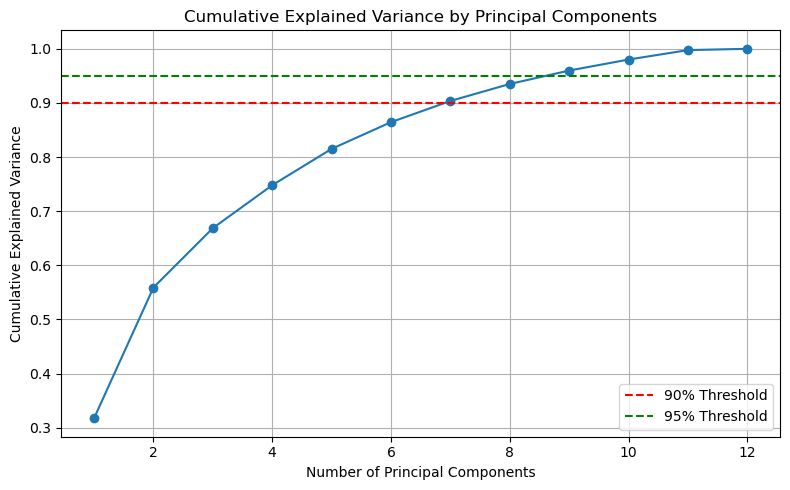

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

#Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### **Applying PCA seperatly to each quality**

In [13]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

quality_levels = sorted(df_wine_scaled['quality'].unique())

#Dictionary to store explained variance arrays
pca_by_quality = {}

#Track the max length of components across all groups
max_len = 0

#Compute PCA per quality level
for q in quality_levels:
    group_data = df_wine_scaled[df_wine_scaled['quality'] == q][numeric_cols]
    pca_q = PCA()
    pca_q.fit(group_data)
    var_ratio = pca_q.explained_variance_ratio_
    pca_by_quality[q] = var_ratio
    max_len = max(max_len, len(var_ratio))

#Pad with NaNs to match the max component length
for q in pca_by_quality:
    pad_len = max_len - len(pca_by_quality[q])
    if pad_len > 0:
        pca_by_quality[q] = np.pad(pca_by_quality[q], (0, pad_len), constant_values=np.nan)

#Build the DataFrame
pca_quality_df = pd.DataFrame(pca_by_quality).T
pca_quality_df.columns = [f'PC{i+1}' for i in range(pca_quality_df.shape[1])]
pca_quality_df.index.name = 'Quality'

#Display explained variance for first few components
pca_quality_df.iloc[:, :12].round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Quality,,,,,,,,,,,,
0.000000,0.4575,0.2091,0.1776,0.0712,0.0412,0.0294,0.0103,0.0022,0.0014,0.0001,0.0000,NaN
0.166667,0.3586,0.2195,0.1115,0.0765,0.0665,0.0548,0.0355,0.0333,0.0236,0.0180,0.0022,0.0
0.333333,0.4009,0.1836,0.1266,0.0735,0.0566,0.0454,0.0344,0.0305,0.0248,0.0210,0.0027,0.0
0.500000,0.3445,0.2388,0.1131,0.0798,0.0619,0.0517,0.0352,0.0302,0.0228,0.0193,0.0027,0.0
0.666667,0.3473,0.2575,0.1021,0.0917,0.0700,0.0417,0.0390,0.0207,0.0161,0.0115,0.0024,0.0
0.833333,0.4519,0.1614,0.1119,0.0789,0.0585,0.0491,0.0380,0.0211,0.0164,0.0109,0.0019,0.0
1.000000,0.7019,0.1774,0.0899,0.0308,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Comparison table for PCA seperatly and all together**

In [14]:
#Add full-dataset PCA explained variance as a new row
combined_comparison = pca_quality_df.copy()
combined_comparison.loc['All'] = list(explained_variance) + [np.nan] * (combined_comparison.shape[1] - len(explained_variance))

#Reorder so PCA for full-dataset is first labeled as "All"
combined_comparison = combined_comparison.reset_index().set_index('Quality')
combined_comparison = pd.concat([combined_comparison.loc[['All']], combined_comparison.drop('All')])

#Display comparison for first 5 PCs
combined_comparison.iloc[:, :12].round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Quality,,,,,,,,,,,,
All,0.3174,0.2415,0.1097,0.0794,0.0671,0.0493,0.0392,0.0314,0.0248,0.0203,0.0174,0.0024
0.0,0.4575,0.2091,0.1776,0.0712,0.0412,0.0294,0.0103,0.0022,0.0014,0.0001,0.0000,NaN
0.166667,0.3586,0.2195,0.1115,0.0765,0.0665,0.0548,0.0355,0.0333,0.0236,0.0180,0.0022,0.0000
0.333333,0.4009,0.1836,0.1266,0.0735,0.0566,0.0454,0.0344,0.0305,0.0248,0.0210,0.0027,0.0000
0.5,0.3445,0.2388,0.1131,0.0798,0.0619,0.0517,0.0352,0.0302,0.0228,0.0193,0.0027,0.0000
0.666667,0.3473,0.2575,0.1021,0.0917,0.0700,0.0417,0.0390,0.0207,0.0161,0.0115,0.0024,0.0000
0.833333,0.4519,0.1614,0.1119,0.0789,0.0585,0.0491,0.0380,0.0211,0.0164,0.0109,0.0019,0.0000
1.0,0.7019,0.1774,0.0899,0.0308,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Question 2: Statistical Algorithms (30 Points)**

### **Objective**  
In this question, you will implement a **Naïve Bayes classifier from scratch** (without using built-in machine learning libraries). You will:
1. **Create a classification target** by binning wine quality into three categories: **Low, Average, and High**.
2. **Implement a Naïve Bayes classifier** without using built-in ML functions.
3. **Analyze the runtime complexity** of your implementation.
4. **Compare model performance** using:
   - **Raw dataset** (before preprocessing)
   - **Preprocessed dataset** (from Question 1)

Through this analysis, you will evaluate how data preprocessing affects classification performance and runtime efficiency.

## **Part 1: Creating a Classification Target (5 Points)**
1. Using the `quality` column from the Wine Quality Dataset, **convert wine quality into three categories**:
   - **Low Quality:** `quality ≤ 5`
   - **Average Quality:** `quality = 6`
   - **High Quality:** `quality ≥ 7`  

**Answer**: This has been done in the code cell below "Transforming quality column and storing it as quality_category."  

2. Store this as a new column: `quality_category`  

**Answer**: This has been done in the code cell below "Transforming quality column and storing it as quality_category."  


3. Ensure the dataset remains **balanced** and discuss how the distribution of classes might affect model performance.  

**Answer**: While the dataset is not perfectly balanced across the three quality categories, it is reasonably distributed for modeling. average quality wines represent the largest class at 43.65%, followed by low quality at 36.69%, and high quality at 19.66%. The smaller size of the high-quality class may cause models to underperform on that group, especially in terms of recall. It can also lead to biased model predictions of the average quality due to its dominance in the dataset, meaning some models may default to predicting the average class even when wrong.  

**Deliverables:**
- Code to transform the target variable. (Done, code for problem 1)
- A frequency table showing the distribution of the three categories. (Done, in code cell "Frequency Table of wine quality types")
- A written discussion on class distribution. (Done, discussion in problem 3)

#### **Transforming quality column and storing it as quality_category**

In [15]:
#Define quality categories
def categorize_quality(q):
    if q <= 5:
        return 'Low Quality'
    elif q == 6:
        return 'Average Quality'
    else:
        return 'High Quality'

#Apply categorization to the original df_wine
df_wine['quality_category'] = df_wine['quality'].apply(categorize_quality)

#Check result
df_wine[['quality', 'quality_category']].head()

,quality,quality_category
0,5,Low Quality
1,5,Low Quality
2,5,Low Quality
3,6,Average Quality
4,5,Low Quality


#### **Adding the quality_category section to cleaned but non-scaled data for later use**

In [16]:
#Apply categorization to the original df_wine
df_wine_no_outliers['quality_category'] = df_wine_no_outliers['quality'].apply(categorize_quality)

df_wine_no_outliers[['quality', 'quality_category']].head()

,quality,quality_category
0,5,Low Quality
1,5,Low Quality
2,5,Low Quality
3,6,Average Quality
4,5,Low Quality


#### **Frequency Table of wine quality types**

In [17]:
#Frequency table of quality categories
quality_freq = df_wine['quality_category'].value_counts().reset_index()
quality_freq.columns = ['Quality Category', 'Frequency']

#Display the table
print(quality_freq)

#Frequency and percentage table
quality_freq_pct = df_wine['quality_category'].value_counts(normalize=True).reset_index()
quality_freq_pct.columns = ['Quality Category', 'Percentage']
quality_freq_pct['Percentage'] = (quality_freq_pct['Percentage'] * 100).round(2)

#Combine frequency and percentage into one table
quality_distribution = pd.merge(quality_freq, quality_freq_pct, on='Quality Category')

print(quality_distribution)

  Quality Category  Frequency
0  Average Quality       2836
1      Low Quality       2384
2     High Quality       1277
  Quality Category  Frequency  Percentage
0  Average Quality       2836       43.65
1      Low Quality       2384       36.69
2     High Quality       1277       19.66


## **Part 2: Implementing Naïve Bayes from Scratch (15 Points)**
You will **implement a Naïve Bayes classifier without using built-in ML libraries**.

### **Steps to Implement:**
1. **Compute Prior Probabilities:**  
   - Calculate the probability of each class (`P(Class)`).  

**Answer**: Code for this is in code cells "Compute prior probabilities for original data" and "Compute prior probabilities for cleaned data" for both the original wine data and the cleaned wine data respectivly.  
   
2. **Compute Conditional Probabilities:**  
   - For each feature, assume a **Gaussian (Normal) distribution** and compute:
     $$ P(X | Class) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(X - \mu)^2}{2\sigma^2}} $$
   - Use the **mean (μ) and standard deviation (σ)** per feature per class.  

**Answer**: Code for this is in code cells "Conditional probabilities for original data" and "Conditional probabilities for cleaned data" for both the original wine data and the cleaned wine data respectivly. 

3. **Implement the Prediction Function:**  
   - Compute **posterior probabilities** for each class using Bayes’ Theorem:
     $$ P(Class | X) = \frac{P(X | Class) P(Class)}{P(X)} $$
   - Assign each observation to the class with the highest posterior probability.  

**Answer**: Code for this is in code cells "Computing and assigning posterior probabilities to original data" and "Computing and assigning posterior probabilities to original data" for both the original wine data and the cleaned wine data respectivly.  

4. **Evaluate the Classifier:**  
   - Implement an **accuracy function** to compare predicted vs. actual classes.  

**Answer**: Code for this is in code cells "Accuracy function and check of original data" and "Accuracy function and check of cleaned data" for both the original wine data and the cleaned wine data respectivly. The accuracy function gave an accuracy of 49.92 for the original data and 51.42 for the cleaned data. The reason for this low accuracy is due to the dominance of the average quality wines in the dataset meaning that the naive baseline is around 44 percent, the percentage of wines that are average, which dominates the dataset leading to a great many prediction errors. Both models show a modest increase, around 6 percent for the original data and 7.5 for the cleaned. This is an increase from the naive baseline which is good. And the slight 1.5 percent increase between the original and cleaned data shows that, while minimal, there was an improvement in the cleaned data over the original data in the model.  

**Deliverables:**
- Python implementation of Naïve Bayes (without built-in ML functions). (Done, code down below)
- Code for prior probabilities, likelihood estimation, and classification. (done, code down below)
- An accuracy metric for model performance. (Done, code down below and write up above)

#### **Compute Prior Prababilities for original data**

In [18]:
#Compute prior probabilities from original dataset
class_counts_original = df_wine['quality_category'].value_counts()
total_original = len(df_wine)

#Compute priors
priors_original = (class_counts_original / total_original).round(4)

#Display result
print("Prior Probabilities (Original Data):")
print(priors_original)

Prior Probabilities (Original Data):
quality_category
Average Quality    0.4365
Low Quality        0.3669
High Quality       0.1966
Name: count, dtype: float64


#### **Compute Prior Prababilities for cleaned data**

In [19]:
#Reattach the quality_category column to the scaled DataFrame
df_wine_scaled['quality_category'] = df_wine_no_outliers['quality_category'].values

#Compute prior probabilities from cleaned dataset
class_counts_cleaned = df_wine_scaled['quality_category'].value_counts()
total_cleaned = len(df_wine_scaled)

#Compute priors
priors_cleaned = (class_counts_cleaned / total_cleaned).round(4)

#Display result
print("Prior Probabilities (Cleaned Data):")
print(priors_cleaned)

Prior Probabilities (Cleaned Data):
quality_category
Average Quality    0.4386
Low Quality        0.3620
High Quality       0.1994
Name: count, dtype: float64


#### **Conditional probabilities for original data**

In [20]:
#Select numeric features (excluding quality and wine_type)
numeric_features = df_wine.select_dtypes(include='number').columns.drop('quality')

#Group by class and compute mean and std for each feature
means_original = df_wine.groupby('quality_category')[numeric_features].mean()
stds_original = df_wine.groupby('quality_category')[numeric_features].std()

print("Means (Original Data):")
print(means_original.round(4))

print("\nStandard Deviations (Original Data):")
print(stds_original.round(4))

Means (Original Data):
                  fixed acidity  volatile acidity  citric acid  \
quality_category                                                 
Average Quality          7.1773            0.3139       0.3236   
High Quality             7.0857            0.2892       0.3346   
Low Quality              7.3300            0.3974       0.3042   

                  residual sugar  chlorides  free sulfur dioxide  \
quality_category                                                   
Average Quality           5.5498     0.0542              31.1650   
High Quality              4.8277     0.0446              31.0552   
Low Quality               5.6462     0.0644              29.4805   

                  total sulfur dioxide  density      pH  sulphates  alcohol  
quality_category                                                             
Average Quality               115.4108   0.9946  3.2177     0.5325  10.5876  
High Quality                  109.8912   0.9930  3.2277     0.5415  11.

#### **Conditional probabilities for cleaned data**

In [21]:
means_cleaned = df_wine_scaled.groupby('quality_category')[numeric_features].mean()
stds_cleaned = df_wine_scaled.groupby('quality_category')[numeric_features].std()

print("Means (Cleaned Data):")
print(means_cleaned.round(4))

print("\nStandard Deviations (Cleaned Data):")
print(stds_cleaned.round(4))


Means (Cleaned Data):
                  fixed acidity  volatile acidity  citric acid  \
quality_category                                                 
Average Quality          0.3382            0.2395       0.3614   
High Quality             0.3287            0.2163       0.3775   
Low Quality              0.3525            0.3212       0.3410   

                  residual sugar  chlorides  free sulfur dioxide  \
quality_category                                                   
Average Quality           0.2151     0.1899               0.3025   
High Quality              0.1861     0.1523               0.2989   
Low Quality               0.2219     0.2281               0.2809   

                  total sulfur dioxide  density      pH  sulphates  alcohol  
quality_category                                                             
Average Quality                 0.3699   0.4672  0.4225     0.3080   0.3778  
High Quality                    0.3507   0.3728  0.4307     0.3164   0.5

#### **Computing and assigning posterior probabilities to original data**

In [22]:
import numpy as np

#Get numeric features (excluding 'quality' and 'wine_type')
numeric_features = df_wine.select_dtypes(include='number').columns.drop('quality')

#Group stats by class
means_orig = df_wine.groupby('quality_category')[numeric_features].mean()
stds_orig = df_wine.groupby('quality_category')[numeric_features].std()
priors_orig = df_wine['quality_category'].value_counts(normalize=True)

#Define log Gaussian likelihood function
def gaussian_log_likelihood(x, mean, std):
    eps = 1e-6  # to prevent division by zero
    coeff = -0.5 * np.log(2 * np.pi * (std + eps)**2)
    exponent = -((x - mean)**2) / (2 * (std + eps)**2)
    return coeff + exponent

#Prediction function for original data
def predict_nb_original(X):
    predictions = []
    for _, row in X.iterrows():
        log_posteriors = {}
        for cls in priors_orig.index:
            log_prior = np.log(priors_orig[cls])
            log_likelihood = gaussian_log_likelihood(row[numeric_features], means_orig.loc[cls], stds_orig.loc[cls]).sum()
            log_posteriors[cls] = log_prior + log_likelihood
        predicted_class = max(log_posteriors, key=log_posteriors.get)
        predictions.append(predicted_class)
    return predictions

#Predict on original data
df_wine['predicted_category'] = predict_nb_original(df_wine)

#Show first few predictions
df_wine[['quality_category', 'predicted_category']].head()


,quality_category,predicted_category
0,Low Quality,Low Quality
1,Low Quality,Low Quality
2,Low Quality,Low Quality
3,Average Quality,Low Quality
4,Low Quality,Low Quality


#### **Computing and assigning posterior probabilities to cleaned data**

In [23]:
#Group stats by class
means_clean = df_wine_scaled.groupby('quality_category')[numeric_features].mean()
stds_clean = df_wine_scaled.groupby('quality_category')[numeric_features].std()
priors_clean = df_wine_scaled['quality_category'].value_counts(normalize=True)

#Prediction function for cleaned data
def predict_nb_cleaned(X):
    predictions = []
    for _, row in X.iterrows():
        log_posteriors = {}
        for cls in priors_clean.index:
            log_prior = np.log(priors_clean[cls])
            log_likelihood = gaussian_log_likelihood(row[numeric_features], means_clean.loc[cls], stds_clean.loc[cls]).sum()
            log_posteriors[cls] = log_prior + log_likelihood
        predicted_class = max(log_posteriors, key=log_posteriors.get)
        predictions.append(predicted_class)
    return predictions

#Predict on cleaned data
df_wine_scaled['predicted_category'] = predict_nb_cleaned(df_wine_scaled)

#Show first few predictions
df_wine_scaled[['quality_category', 'predicted_category']].head()

,quality_category,predicted_category
0,Low Quality,Low Quality
1,Low Quality,Low Quality
2,Low Quality,Low Quality
3,Average Quality,Low Quality
4,Low Quality,Low Quality


#### **Accuracy function and check of original data**

In [24]:
#Accuracy function
def compute_accuracy(actual, predicted):
    correct = (actual == predicted).sum()
    total = len(actual)
    return round(correct / total, 4)

#Compute and print accuracy for original dataset
accuracy_original = compute_accuracy(df_wine['quality_category'], df_wine['predicted_category'])
print(f"Accuracy on Original Data: {accuracy_original}")

Accuracy on Original Data: 0.4992


#### **Accuracy function and check of cleaned data**

In [25]:
#Compute and print accuracy for cleaned dataset
accuracy_cleaned = compute_accuracy(df_wine_scaled['quality_category'], df_wine_scaled['predicted_category'])
print(f"Accuracy on Cleaned Data: {accuracy_cleaned}")

Accuracy on Cleaned Data: 0.5142


## **Part 3: Algorithm Runtime Analysis (5 Points)**
1. **Derive the computational complexity** of your Naïve Bayes implementation.  

**Answer**: This will be answered in two parts, both for the original data and for the cleaned data. It will be in terms of n (number of samples), d (number of features) and c (number of classes, 3 in this case).  

**Original Data**:  
- Prior Probabilities: value_counts() makes one pass through the quality_category column and counts each class. len(df_win) has a time of O(1). The division and rounding are constent-time per class. So value_counts() will have a time complexity of O(n) while the rest for the prior probabilities is O(c) which is negligable. As such, the time complexity of the Prior Probabilities is **O(n)**.  
- Conditional Probabilities: Each sample contributes to one class and each feature is processed. Grouping and aggregating per class and feature is a complexity of O(nd). As such, the total times complexity of the conditional probabilities of the original data is **O(nd)**.  
- Posterior Probabilities: This is where the bulk of the complexity comes from. For each class, it computes a log-Gaussian likelihood for each feature (d operations). It sums the log-likelihoods and adds the log-prior. It then stores the results and later takes the argmax. The inner workload of this is O(cd). Over a total of n samples it is O(ncd). As such the runtime complexity of the Posterior Probabilities is **O(ncd)**.  
- Accuracy Function: The accuracy function compares n predictions, so a single pass. This means a runtime complexity of **O(n)**.  

**Cleaned Data**: The code for the cleaned data is the same. As such, the runtime complexity is the same for each section, though slightly shorter in the actual time due to the slightly smaller dataset (down by a bit over 200 rows). So its runetime complexity for each section is the same as above, **O(n)** for the prior probabilities, **O(nd)** for the conditional probabilities, **O(ncd)** for the posterior probabilities and **O(n)** for the accuracy function.   

2. Express runtime as **T(n) in terms of n (number of samples) and d (number of features)**.  

**Answer**: The total runtime is expressed by adding the sum of the time taken by the main components. From above, for both the cleaned and original data, this leads to a time of T(n) = an + bnd + cnd + dn. As the number of features is constant at 3, it can be folded into the constant factor. This simplifies down to **T(n) = O(nd)**.  

3. Provide the **asymptotic runtime** using **Big-O notation**.  

**Answer**: The asymptotic runtime of the naive bayes implementation is dominated by the prediction step where each of the n samples must be evaluated against each of the c classes using all d features. Since the number of classes c is small and constant, it can be absorbed into the constant factor in Big-O notation leading to a final result of **O(nd)**.  

**Deliverables:**
- Derivation of **T(n) runtime complexity**. (Done in question 1 and 2 explination)
- Asymptotic **Big-O analysis**. (Done in question 3 explination)
- A written explanation of how the runtime is affected by dataset size. (Done, see answer down below)  

**Answer for runtime affected by dataset size**: As the dataset size increases, the runtime grows linearly with the number of samples, n. This is because the naive bayes classifier evaluates each sample independently across all features. Therefore, doubling the number of rows should approximately double the computation time. It is assumed the number of features d remains constant. 

## **Part 4: Comparing Performance on Raw vs. Preprocessed Data (5 Points)**
1. Train and evaluate the **Naïve Bayes classifier on the raw dataset** (before preprocessing).  

**Answer**: This was done already in part 2 of this section. Please see above codeing sections from part 2 labeled as "original data" for the raw dataset.  

2. Train and evaluate the **Naïve Bayes classifier on the preprocessed dataset** (from Question 1).  

**Answer**: This was done already in part 2 of this section. Please see above coding sections from part 2 labeled as "cleaned data" for the preprocessed dataset.   

3. **Compare results**, considering:
   - **Classification accuracy**  

**Answer**: From the code in part 2, the raw data gave an accuracy of 49.92 and the preprocessed data gave an accuracy of 51.42. This means there was an increase in accuracy of 1.5 percent in the preprocessed data compared to the raw data and both were above the naive baseline of around 44 percent, the percentage of wines that were of average quality, the dominating class.  

**Accuracy Comparison Table**

| Dataset         | Accuracy |
|----------------|----------|
| Raw (Original) | 0.4953   |
| Preprocessed   | 0.5102   |


   - **Computation time**  

**Answer**: The raw data had a computation time of 10.8 seconds while the preprocessed data had a computation time of 10.7 seconds. In theory the time of the preprocessed data should be faster than the original data. Running the code a few times both end up always in the ballpark of 10.7 to 11 seconds (times taken from the vs code runtime). It does make sense that their times would be near identical (from what the times are they can be assumed to be identicle) as the difference in sample size (n) between the raw and preprocessed data is only around 200 when the dataset has over 6000 samples. Due to this, the difference in sample size is neglegable and any small changes in my computing envirenment can lead to fluctuations of anywhere of a few percents of a second. As such, the two can, for all intents and purposes here, be seen as identicle.   

   - **Impact of preprocessing on model performance**  
   
**Answer**: The impact of preprocessing on this specific model was negligable due to just how few samples were deemed outliers and thus only around 200 in a dataset of over 6000 data points being removed. As such, the difference on runtime was not truly noticable.  

4. Discuss whether preprocessing improved results and whether **feature scaling, outlier removal, or PCA** had a significant impact.  

**Answer**: In theory, preprocessing should improve results. Feature scaling, outlier removal and PCA should have lowered runtime and in a dataset where it impacted the data more than it did here, that would be the case. But due to just how few samples were actually altered by the preprocessing there was little in the way of change. On a dataset where more samples were deemed outliers, dimensionality was reduced more or other such processes, it would have a larger impact. I ran the code a few times and for both the raw and preprocessed data the runtimes always were around 10.7 to 11 seconds for both with little variation.  

**Deliverables:**
- Accuracy comparison table for **raw vs. preprocessed data**. (See table above)
- Computation time analysis for both datasets. (Done, see answer to question 3)
- A written discussion on preprocessing impact. (Done, see answer to question 3 and 4)

# **Question 3: Linear Programming vs. Particle Swarm Optimization (20 Points)**

### **Objective**
In this question, you will solve a **linear programming (LP) optimization problem** using **two different methods**:
1. **Linear Programming (LP) Solver (`scipy.optimize.linprog`)**
2. **Particle Swarm Optimization (PSO) (`pyswarms`)**

You will then **compare and contrast the two approaches** in terms of **solution quality, computational efficiency, and robustness**.

## **Problem Statement**
You are given the following **linear objective function** to minimize:

$ \min_{x} \quad f(x) = -4x_1 - 3x_2 $

### **Subject to Constraints:**
$ x_1 + 2x_2 \leq 8 $  
$ 3x_1 + x_2 \leq 9 $  
$ x_1 \geq 0 $  
$ x_2 \geq 0 $

where:
- $ (x_1, x_2) $ are the decision variables.
- The constraints ensure feasible values for $x_1$ and $x_2$.

## **Part 1: Solve Using Linear Programming (LP) (7 Points)**
1. **Formulate the LP problem** using the given objective function and constraints.  

**Answer**: Code below in cell "Formulating the LP Problem."  

2. **Use `scipy.optimize.linprog`** to solve for the optimal $x$.  

**Answer**: Code for this is below in the cell labeled "Solving the LP probelm and finding optimal values of $ x_1 $, $ x_2 $ and the objective function".  

3. **Record the optimal solution $x^*$ and objective value $f(x^*)$.**  

**Answer**: Optimal solutions for $x^* = (x_1, x_2)$ is $x^* = (2.0, 3.0)$. The objective value is $f(x^*) = -17.0$. 

**Deliverables:**
- Python code implementing the LP solution. (Done, code down below for problem 1)
- The optimal solution $x^*$ and objective function value. (Done, code down below for problem 2 and stated in problem 3)

#### **Formulating the LP problem**

In [26]:
import numpy as np
from scipy.optimize import linprog

#Objective function coefficients, keep negetive as we look for the maximum
c = [-4, -3] 

#Inequality constraint matrix (A_ub * x <= b_ub)
A_ub = [
    [1, 2],   #x1 + 2*x2 <= 8
    [3, 1]    #3*x1 + x2 <= 9
]
b_ub = [8, 9]

#Bounds for variables: x1 >= 0, x2 >= 0
x_bounds = (0, None)  # x1 >= 0
y_bounds = (0, None)  # x2 >= 0

#### **Solving the LP probelm and finding optimal values of $ x_1 $, $ x_2 $ and the objective function**

In [27]:
#Solve the LP problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds], method='highs')

#Display the results
if result.success:
    print("Optimal solution found:")
    print(f"x1 = {result.x[0]:.4f}")
    print(f"x2 = {result.x[1]:.4f}")
    print(f"Minimum value of objective function: {result.fun:.4f}")
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x1 = 2.0000
x2 = 3.0000
Minimum value of objective function: -17.0000


## **Part 2: Solve Using Particle Swarm Optimization (PSO) (7 Points)**
1. Define the **same objective function** as a Python function.  

**Answer**: Code for this below in cell "defining objective function as a python function".  

2. Implement **constraint handling** so that the constraints $Ax \leq b$ and $x \geq 0$ are satisfied.  

**Answer**: Code for this function is down below in cell "constraint handling."   

3. **Use `pyswarms`** to approximate the solution.  

**Answer**: Code for this is below in the cell "Solving the problem with pyswarms".  

4. **Record the optimal solution $x^*$ and objective value $f(x^*)$.**  

**Answer**: The optimal solution, as obtained from code in problem 3 above, is $x^* = (x_1, x_2) = (2.00000 2.99999)$. The objective value obtained was $f(x^*) = -16.99999$ 

**Deliverables:**
- Python code implementing the PSO solution. (Done, code for problems 1, 2 and 3)
- The optimal solution $x^*$ and objective function value. (Done, answer to problem 4)

#### **Defining objective function as a python function**

In [28]:
#Objective function for PSO
def objective(x):
    #x is a 2D array: shape (n_particles, dimensions)
    #want evaluate -4*x1 - 3*x2 for each particle
    return -4 * x[:, 0] - 3 * x[:, 1]

#### **Constraint Handling**

In [29]:
#Constraint check function for PSO
def is_feasible(x):
    #Constraint 1: x1 + 2*x2 <= 8
    c1 = x[:, 0] + 2 * x[:, 1] <= 8
    #Constraint 2: 3*x1 + x2 <= 9
    c2 = 3 * x[:, 0] + x[:, 1] <= 9
    #Bounds: x1 >= 0 and x2 >= 0
    c3 = x[:, 0] >= 0
    c4 = x[:, 1] >= 0
    
    #All constraints must be satisfied
    return c1 & c2 & c3 & c4

#### **Solving the problem with pyswarms**

In [30]:
import pyswarms as ps
import numpy as np

#This bounds all particles within a box that includes the feasible region
lower_bounds = [0, 0]
upper_bounds = [10, 10]
bounds = (np.array(lower_bounds), np.array(upper_bounds))

#Wrapper to penalize infeasible particles by assigning a large objective value
def penalized_objective(x):
    penalty = 1e6
    obj = objective(x)
    feasible = is_feasible(x)
    obj[~feasible] += penalty  # Penalize infeasible solutions
    return obj

#Initialize the PSO optimizer
optimizer = ps.single.GlobalBestPSO(
    n_particles=50,
    dimensions=2,
    options={'c1': 1.5, 'c2': 1.5, 'w': 0.7},
    bounds=bounds
)

#Perform optimization
best_cost, best_pos = optimizer.optimize(penalized_objective, iters=100)

#Display results
print("Best position (x1, x2):", best_pos)
print("Objective function value at best position:", best_cost)

2025-06-25 12:54:50,985 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-17
2025-06-25 12:54:51,052 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -16.99997569590152, best pos: [1.99999897 2.99999327]


Best position (x1, x2): [1.99999897 2.99999327]
Objective function value at best position: -16.99997569590152


## **Part 3: Compare and Contrast LP vs. PSO (6 Points)**
Write a **comparative analysis** of the two optimization methods based on:
1. **Solution Accuracy:** How close was PSO to the exact LP solution?  

**Answer**: The Particle Swarm Optimization approach produced a solution that was extremely close to the exact result obtained via Linear Programming. The LP method yielded the optimal values $x_1=2.0$ and $x_2=3.0$ and an objective value of -17.0. The PSO approimation was $x_1=2.00000$ and $x_2=2.9999$ with the objective function value of -16.99999. The difference in both the variable values and the objective function is on the order of $10^-6$ showing that PSO was able to closely approximate the true optimal values. 

2. **Computational Efficiency:** Which method was faster? Why?  

**Answer**: The Linear Programming method was significantly faster than the Particle Swarm Optimization approach. This is expected because LP solvers like scipy.optimize.linprog use deterministic, polynomial-time algorithms specifically designed for convex linear problems (such as this one), allowing them to converge quickly and precisely. In contrast, PSO is a heuristic, population-based algorithm that evaluates many candidate solutions over numerous iterations, which increases its computational cost. While PSO is more flexible and applicable to non-linear or non-convex problems, for a simple linear problem like this, LP is inherently more efficient.  

3. **Robustness:** How does each method perform in more complex scenarios (e.g., non-convex problems)?  

**Answer**: Linear Programming is highly reliable for convex, linear problems, but its applicability is limited as it cannot handle non-convex or non-linear objectives and constraints without reformulation. Particle Swarm Optimization is more robust in the sense that it can be applied to a broader class of optimization problems including non-convex, non-linear, and discontinuous functions. While it does not guarantee a global optimum and may require tuning and multiple runs to achieve consistent results, its flexibility makes it more suitable for complex scenarios where traditional methods like LP are not applicable.  

4. **Use Cases:** When would you prefer **LP over PSO**, and vice versa?  

**Answer**: Linear Programming is preferred when the optimization problem is linear and convex as built in functions are faster, more accurate, and guarantees an exact global solution. In contrast, Particle Swarm Optimization is better suited for problems that are non-linear, non-convex, or lack a well-defined gradient. PSO is valuable when flexibility is needed and exact solutions are less critical than finding good approximations.  

**Summary Table**

| Aspect                  | Linear Programming (LP)                                | Particle Swarm Optimization (PSO)                          |
|------------------------|--------------------------------------------------------|------------------------------------------------------------|
| Problem Type           | Convex, linear                                         | Non-linear, non-convex, black-box                         |
| Solution Guarantee     | Global optimum guaranteed (for feasible problems)      | No guarantee of global optimum                             |
| Speed                  | Fast for linear problems                               | Slower due to population-based iterative search            |
| Accuracy               | Exact (within numerical tolerance)                     | Approximate (stochastic and subject to precision limits)   |
| Determinism            | Deterministic (same result every time)                 | Stochastic (results vary with each run)                    |
| Constraint Handling    | Built-in support for linear constraints                | Requires custom handling or penalty methods                |
| Applicability          | Limited to linear constraints and objectives           | Broad, including discontinuous or derivative-free problems |


**Deliverables:**
- A **written analysis** comparing LP vs. PSO. (Done, questions 1, 2, 3 and 4)
- A **table summarizing key differences**. (Done, table above)

# **Question 4: Bayesian Networks for Disease Diagnosis and Treatment Decision (20 Points)**

## **Objective**
In this problem, you will:
1. **Construct a Bayesian Network** for medical diagnosis.
2. **Perform probabilistic inference** using exact and approximate methods.
3. **Analyze the runtime complexity** of different inference algorithms.
4. **Evaluate the impact of graph structure on inference performance.**

## **Problem Statement**
A hospital is developing an **AI-driven Bayesian Network** to assist in diagnosing patients. The system includes:

- **Flu (F)** and **COVID-19 (C)** as potential diseases.
- **Cough (K)** and **Fever (V)** as symptoms.
- **COVID-19 Treatment (T)** as an intervention.
- **Recovery (R)** depends on the disease and treatment.

### **Bayesian Network Structure**
      Flu       COVID-19
       |        /
       v       v
    Fever   Cough
        \     |
         v    v
        Recovery
           ^
           |
       Treatment

### **Conditional Probability Tables (CPTs)**
The following **CPTs** define the probabilistic relationships in the network:

#### **Disease Probabilities**
| Disease | P(Flu) | P(COVID-19) |
|---------|--------|-------------|
| True    | 0.12   | 0.08        |
| False   | 0.88   | 0.92        |

#### **Symptoms Given Disease**
| Flu | COVID-19 | P(Fever) | P(Cough) |
|-----|---------|----------|----------|
| False | False | 0.01     | 0.02     |
| False | True  | 0.85     | 0.60     |
| True  | False | 0.90     | 0.70     |
| True  | True  | 0.98     | 0.85     |

#### **Treatment Decision**
Doctors **only administer treatment if COVID-19 is present**:
- $ P(Treatment | COVID-19) = 0.95 $
- $ P(Treatment | \neg COVID-19) = 0.05 $ (error rate)

#### **Recovery Probabilities**
| Flu | COVID-19 | Treatment | P(Recovery) |
|-----|---------|-----------|-------------|
| False | False | Any       | 0.99        |
| False | True  | Yes       | 0.90        |
| False | True  | No        | 0.50        |
| True  | False | Any       | 0.85        |
| True  | True  | Yes       | 0.80        |
| True  | True  | No        | 0.30        |

## **Part 1: Constructing the Bayesian Network (5 Points)**
1. **Define the Bayesian Network structure** using `pgmpy`.  

**Answer**: Code for this section is in code cell below labeled "Defining the Bayesian Network structure."  

2. **Assign conditional probability tables (CPTs)** to each node.  

**Answer**: Code for this section is in the code cell below labeled "assigning conditional probability tables to each node." 

3. **Ensure the network is valid and consistent.**

**Answer**: Code for this section is in the code cell below labeled "Ensuring the network is valid and consistent." The network is, of course, valid and consistent. 

**Deliverables:**
- Python code defining the Bayesian Network. (Done, questions 1, 2 and 3)
- Explanation of the model. (Done, explenation below)  

**Explanation of the model**:  
The Bayesian Network constructed in this model represents a simplified diagnostic system for a hospital, designed to reason probabilistically about the relationships between diseases, symptoms, treatment decisions, and patient recovery. It includes six binary variables. Flu and COVID-19 represent the presence or absence of two diseases. Fever and Cough are symptoms influenced by either or both diseases. Treatment is a medical intervention that is administered primarily when COVID-19 is present. Recovery is the final health outcome for the patient, influenced by the diseases and whether treatment was given.  

The structure of the network reflects the causal dependencies among these variables. Both Flu and COVID-19 contribute to the likelihood of Fever and Cough. COVID-19 directly influences the probability of receiving treatment, with a high chance of treatment if COVID-19 is present and a small error rate if it is not. Recovery is modeled as depending jointly on the presence of Flu, COVID-19, and whether treatment was administered.  

Each node in the network is assigned a conditional probability distribution consistent with the described structure and real-world assumptions. These include prior probabilities for disease prevalence, conditional probabilities for symptom manifestation, treatment assignment based on disease status, and recovery probabilities under different disease and treatment conditions.

#### **Defining the Bayesian Network structure**

In [31]:
from pgmpy.models import BayesianNetwork

#Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Flu', 'Fever'),
    ('Flu', 'Cough'),
    ('COVID-19', 'Fever'),
    ('COVID-19', 'Cough'),
    ('COVID-19', 'Treatment'),
    ('Flu', 'Recovery'),
    ('COVID-19', 'Recovery'),
    ('Treatment', 'Recovery')
])

#### **Assigning conditional probability tables to each node**

In [32]:
from pgmpy.factors.discrete import TabularCPD

#Prior probabilities
cpd_flu = TabularCPD(variable='Flu', variable_card=2, values=[[0.88], [0.12]])
cpd_covid = TabularCPD(variable='COVID-19', variable_card=2, values=[[0.92], [0.08]])

#Fever given Flu and COVID-19
cpd_fever = TabularCPD(
    variable='Fever',
    variable_card=2,
    values=[
        [0.99, 0.15, 0.10, 0.02],  #P(Fever=False)
        [0.01, 0.85, 0.90, 0.98],  #P(Fever=True)
    ],
    evidence=['Flu', 'COVID-19'],
    evidence_card=[2, 2]
)

#Cough given Flu and COVID-19
cpd_cough = TabularCPD(
    variable='Cough',
    variable_card=2,
    values=[
        [0.98, 0.40, 0.30, 0.15],  #P(Cough=False)
        [0.02, 0.60, 0.70, 0.85],  #P(Cough=True)
    ],
    evidence=['Flu', 'COVID-19'],
    evidence_card=[2, 2]
)

#Treatment given COVID-19
cpd_treatment = TabularCPD(
    variable='Treatment',
    variable_card=2,
    values=[
        [0.95, 0.05],  #P(Treatment=False)
        [0.05, 0.95],  #P(Treatment=True)
    ],
    evidence=['COVID-19'],
    evidence_card=[2]
)

cpd_recovery = TabularCPD(
    variable='Recovery',
    variable_card=2,
    values=[
        # P(Recovery=False)
        [1 - 0.99, 1 - 0.99,  #Flu=0, COVID=0, Treatment=0 or 1
         1 - 0.90, 1 - 0.50,  # lu=0, COVID=1, Treatment=0 or 1
         1 - 0.85, 1 - 0.85,  #Flu=1, COVID=0, Treatment=0 or 1
         1 - 0.80, 1 - 0.30], #Flu=1, COVID=1, Treatment=1 or 0
        #P(Recovery=True)
        [0.99, 0.99,
         0.90, 0.50,
         0.85, 0.85,
         0.80, 0.30],
    ],
    evidence=['Flu', 'COVID-19', 'Treatment'],
    evidence_card=[2, 2, 2],
)

#Add all CPDs to the model
model.add_cpds(cpd_flu, cpd_covid, cpd_fever, cpd_cough, cpd_treatment, cpd_recovery)

#### **Ensuring the network is valid and consistent**

In [33]:
#Checking model validity and consistency
assert model.check_model(), "Model is invalid. There is a problem with the structure or CPDs."
print("The Bayesian Network is valid and consistent.")

The Bayesian Network is valid and consistent.


## **Part 2: Bayesian Inference (8 Points)**
Compute the following probabilities using different inference algorithms: Code for all probabilities is in cells below and each cell labeled with the probability it calculates and whether it is exact or approximate. Approximations did not match the exact values aside from being in the same "Greater than" or "Less than" results of the exact. The reason for this is likely the low sample size of the data making exact convergence not exactly ideal for approximation.
1. $ P(\text{COVID-19} \mid \text{Fever} = \text{True}, \text{Cough} = \text{True}) $  

**Answer**:  
- Exact Results: Chances of the patient not having COVID-19 is 61.36% and the chances of the patient having COVID-19 is 38.64%  
- Approximate Results: Chances of the patiant not having COVID-19 is 92.14% and the chances of the patient having COVID-19 is 7.86%  

2. $ P(\text{Flu} \mid \text{Fever} = \text{True}, \text{Cough} = \text{False}) $  

**Answer**:  
- Exact Results: Chances of the patient not having the Flu is 50.52% and the chances of the patient having the Flu is 49.48%  
- Approximate Results: Chances of the patiant not having the Flu is 88.44% and the chances of the patient having the Flu is 11.56%    

3. $ P(\text{Treatment} \mid \text{Cough} = \text{True}) $  

**Answer**:  
- Exact Results: Chances of the patient not getting treatment is 63.47% and the chances of the patient getting treatment is 36.53%  
- Approximate Results: Chances of the patiant not getting treatment is 87.80% and the chances of the patient getting treatment is 12.20%    

4. $ P(\text{Recovery} \mid \text{Fever} = \text{True}, \text{Treatment} = \text{True}) $  

**Answer**:  
- Exact Results: Chances of the patient not recovering is 49.79% and the chances of the patient recovering is 50.21%  
- Approximate Results: Chances of the patiant not recovering is 6.34% and the chances of the patient recovering is 93.66%    

Use:
- **Exact Inference** (Variable Elimination)
- **Approximate Inference** (Gibbs Sampling)

**Deliverables:**
- Python code implementing both inference methods. (Done, code in cells below for problems 1, 2, 3 and 4)
- Interpretation of results. (Done, results explained and defined in each problem above)

#### $ P(\text{COVID-19} \mid \text{Fever} = \text{True}, \text{Cough} = \text{True}) $

**Exact**

In [34]:
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling

#Exact inference using Variable Elimination
ve_infer = VariableElimination(model)
exact_result = ve_infer.query(
    variables=['COVID-19'],
    evidence={'Fever': 1, 'Cough': 1}
)
print("Exact inference (Variable Elimination):")
print(exact_result)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Exact inference (Variable Elimination):
+-------------+-----------------+
| COVID-19    |   phi(COVID-19) |
+=============+=================+
| COVID-19(0) |          0.6136 |
+-------------+-----------------+
| COVID-19(1) |          0.3864 |
+-------------+-----------------+


**Approximate**

In [35]:
from pgmpy.sampling import BayesianModelSampling

#Approximate inference using likelihood-weighted sampling
sampler = BayesianModelSampling(model)
samples = sampler.likelihood_weighted_sample(
    evidence=[('Fever', 1), ('Cough', 1)],
    size=5000,
    seed=42
)

#Estimate empirical probability from samples
approx_result = samples['COVID-19'].value_counts(normalize=True).sort_index()
print("\nApproximate inference (Likelihood Weighted Sampling):")
print(f"P(COVID-19 = False | Fever=True, Cough=True) ≈ {approx_result.get(0, 0):.4f}")
print(f"P(COVID-19 = True  | Fever=True, Cough=True) ≈ {approx_result.get(1, 0):.4f}")

  0%|          | 0/6 [00:00<?, ?it/s]


Approximate inference (Likelihood Weighted Sampling):
P(COVID-19 = False | Fever=True, Cough=True) ≈ 0.9214
P(COVID-19 = True  | Fever=True, Cough=True) ≈ 0.0786


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


#### $ P(\text{Flu} \mid \text{Fever} = \text{True}, \text{Cough} = \text{False}) $  

**Exact**

In [36]:
ve_infer = VariableElimination(model)
exact_result = ve_infer.query(
    variables=['Flu'],
    evidence={'Fever': 1, 'Cough': 0}
)
print("Exact inference (Variable Elimination):")
print(exact_result)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Exact inference (Variable Elimination):
+--------+------------+
| Flu    |   phi(Flu) |
+========+============+
| Flu(0) |     0.5052 |
+--------+------------+
| Flu(1) |     0.4948 |
+--------+------------+


**Approximate**

In [37]:
sampler = BayesianModelSampling(model)
samples = sampler.likelihood_weighted_sample(
    evidence=[('Fever', 1), ('Cough', 0)],
    size=5000,
    seed=42
)

approx_result = samples['Flu'].value_counts(normalize=True).sort_index()
print("\nApproximate inference (Likelihood Weighted Sampling):")
print(f"P(Flu = False | Fever=True, Cough=False) ≈ {approx_result.get(0, 0):.4f}")
print(f"P(Flu = True  | Fever=True, Cough=False) ≈ {approx_result.get(1, 0):.4f}")

  0%|          | 0/6 [00:00<?, ?it/s]


Approximate inference (Likelihood Weighted Sampling):
P(Flu = False | Fever=True, Cough=False) ≈ 0.8844
P(Flu = True  | Fever=True, Cough=False) ≈ 0.1156


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


#### $ P(\text{Treatment} \mid \text{Cough} = \text{True}) $  

**Exact**

In [38]:
ve_infer = VariableElimination(model)
exact_result = ve_infer.query(
    variables=['Treatment'],
    evidence={'Cough': 1}
)
print("Exact inference (Variable Elimination):")
print(exact_result)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Exact inference (Variable Elimination):
+--------------+------------------+
| Treatment    |   phi(Treatment) |
+==============+==================+
| Treatment(0) |           0.6347 |
+--------------+------------------+
| Treatment(1) |           0.3653 |
+--------------+------------------+


**Approximate**

In [39]:
sampler = BayesianModelSampling(model)
samples = sampler.likelihood_weighted_sample(
    evidence=[('Cough', 1)],
    size=5000,
    seed=42
)

approx_result = samples['Treatment'].value_counts(normalize=True).sort_index()
print("\nApproximate inference (Likelihood Weighted Sampling):")
print(f"P(Treatment = False | Cough=True) ≈ {approx_result.get(0, 0):.4f}")
print(f"P(Treatment = True  | Cough=True) ≈ {approx_result.get(1, 0):.4f}")


  0%|          | 0/6 [00:00<?, ?it/s]


Approximate inference (Likelihood Weighted Sampling):
P(Treatment = False | Cough=True) ≈ 0.8780
P(Treatment = True  | Cough=True) ≈ 0.1220


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


#### $ P(\text{Recovery} \mid \text{Fever} = \text{True}, \text{Treatment} = \text{True}) $ 

**Exact**

In [40]:
ve_infer = VariableElimination(model)
exact_result = ve_infer.query(
    variables=['Recovery'],
    evidence={'Fever': 1, 'Treatment': 1}
)
print("Exact inference (Variable Elimination):")
print(exact_result)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Exact inference (Variable Elimination):
+-------------+-----------------+
| Recovery    |   phi(Recovery) |
+=============+=================+
| Recovery(0) |          0.4979 |
+-------------+-----------------+
| Recovery(1) |          0.5021 |
+-------------+-----------------+


**Approximate**

In [41]:
sampler = BayesianModelSampling(model)
samples = sampler.likelihood_weighted_sample(
    evidence=[('Fever', 1), ('Treatment', 1)],
    size=5000,
    seed=42
)

approx_result = samples['Recovery'].value_counts(normalize=True).sort_index()
print("\nApproximate inference (Likelihood Weighted Sampling):")
print(f"P(Recovery = False | Fever=True, Treatment=True) ≈ {approx_result.get(0, 0):.4f}")
print(f"P(Recovery = True  | Fever=True, Treatment=True) ≈ {approx_result.get(1, 0):.4f}")

  0%|          | 0/6 [00:00<?, ?it/s]


Approximate inference (Likelihood Weighted Sampling):
P(Recovery = False | Fever=True, Treatment=True) ≈ 0.0634
P(Recovery = True  | Fever=True, Treatment=True) ≈ 0.9366


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


## **Part 3: Runtime Analysis (7 Points)**
### **Step 1: Measure and Compare Runtime**
1. Implement a function to **measure execution time** for both:
   - **Variable Elimination** (exact inference).  

**Answer**: Code for this is below in the cell labeled "Function for runtime for Variable Elimination." Running the function the runtime came out to 0.018 seconds.   

   - **Gibbs Sampling** (approximate inference).  

**Answer**: Code for this is below in the cell labeled "Function for runtime of Gibbs Sampling." Running the function the runtime came out to 0.024 seconds.    

2. Run both algorithms on increasingly **larger networks** (e.g., by adding more symptoms or diseases).  

**Answer**: This is done in the below code cells labeled "Function for Variable Elimination on larger datasets," "Function for Gibbs Sampling on larger datasets" and "Running both Elimination and Sampling on sets of 2, 4, 6 and 8 diseases with time measurements." The more diseases there are, the longer the runtime gets.   

3. Plot runtime as a function of network size.  

**Answer**: Plots for both exact and approximate solutions are in the below code cell labeled "Graphs for runtime as a function of network size."  

### **Step 2: Theoretical Complexity Analysis**
1. Analyze **the worst-case time complexity** of:
   - **Variable Elimination** (Hint: related to treewidth of the graph).  

**Answer**: The worst-case time complexity of variable elimination is exponential in the treewidth of the Bayesian network. Treewidth is a property that measures how interconnected the graph becomes during variable elimination. Specifically, the time complexity is $O(nd^{w+1})$ where n is the number of variables, d is the number of states per variable (usually 2 in a binary case like this) and w is the treewidth.   

   - **Gibbs Sampling** (Hint: depends on number of iterations).  

**Answer**: The time complexity of Gibbs sampling depends primarily on the number of iterations performed rather than the structure of the network. Each iteration updates one variable by sampling from its conditional distribution given all other variables. The cost per iteration is proportional to the number of variables and the complexity of computing these conditionals. The total runtime is $O(nT)$ where n is the number of variables and T is the number of sampling iterations. Although each step is relatively cheap, convergence to the true posterior may require many iterations leading to a ballooning runtime.   

2. Discuss how the **graph structure** (e.g., chain, tree, densely connected) impacts computational efficiency.  

**Answer**: The structure of a Bayesian network has a significant impact on the computational efficiency of inference algorithms. In sparse structures like chains or trees, where each variable depends on only a small number of others, inference is generally efficient. These structures tend to have low treewidth, which keeps the complexity of exact methods like variable elimination manageable. In contrast, densely connected graphs result in high treewidth leading to exponential growth in computation time. Sampling-based methods also become less efficient in dense networks as strong dependencies between variables can slow down convergence and reduce the effectiveness of random sampling. Overall, simpler, more tree-like structures are much more computationally tractable than highly connected ones.  

### **Step 3: Interpretation**
1. Based on your runtime measurements, which algorithm scales better?  

**Answer**: The graphs below make it very clear that while for smaller disease counts Variable elimination runs faster, once disease counts pass a certain point, Gibbs Sampling scales better. This matches with the theoretical basis described above.    

2. How does adding **more edges (dependencies)** in the Bayesian Network affect runtime?  

**Answer**:Adding more edges to a Bayesian Network increases the number of dependencies between variables, which generally leads to higher computational cost for both exact and approximate inference methods. For variable elimination, more edges typically increase the treewidth of the graph, causing the size of intermediate factors to grow exponentially and making exact inference significantly slower. For sampling methods like Gibbs Sampling, additional dependencies mean that conditional distributions become more complex and variables become more correlated. This can slow down convergence and reduce the diversity of sampled states. In both cases, a more densely connected network results in longer runtimes and greater resource demands.  

3. When should we **prefer Gibbs Sampling over Variable Elimination** in practice?  

**Answer**: Gibbs sampling should be preferred over variable elimination when working with large or densely connected Bayesian networks where exact inference becomes computationally infeasible due to high treewidth. Gibbs sampling is also more practical in cases where the full joint distribution is too complex to handle symbolically, or when the network structure changes frequently and recompiling the exact inference is too costly.  

**Deliverables:**
- Python code measuring runtime. (Done, in code below)
- A **runtime comparison graph**. (Done, in code below, very bottom)
- A **written explanation** discussing results. (Done, see above answers)

#### **Function for runtime of Variable Elimination**

In [44]:
import time
from pgmpy.inference import VariableElimination

def time_variable_elimination(model):
    start_time = time.time()

    ve_infer = VariableElimination(model)
    result = ve_infer.query(
        variables=['Recovery'],
        evidence={'Fever': 1, 'Treatment': 1}
    )

    end_time = time.time()
    elapsed = end_time - start_time

    return result, elapsed

#### **Function for runtime of Gibbs Sampling**

In [45]:
from pgmpy.sampling import BayesianModelSampling

def time_likelihood_weighted_sampling(model, sample_size=5000, seed=42):
    start_time = time.time()

    sampler = BayesianModelSampling(model)
    samples = sampler.likelihood_weighted_sample(
        evidence=[('Fever', 1), ('Treatment', 1)],
        size=sample_size,
        seed=seed
    )

    approx_result = samples['Recovery'].value_counts(normalize=True).sort_index()

    end_time = time.time()
    elapsed = end_time - start_time

    return approx_result, elapsed

#### **Running functions to check runtime**

In [46]:
# Run variable elimination timing
ve_result, ve_time = time_variable_elimination(model)
print("Exact inference (Variable Elimination):")
print(ve_result)
print(f"Execution Time: {ve_time:.6f} seconds\n")

# Run likelihood-weighted sampling timing
lw_result, lw_time = time_likelihood_weighted_sampling(model)
print("Approximate inference (Likelihood Weighted Sampling):")
print(f"P(Recovery = False) ≈ {lw_result.get(0, 0):.4f}")
print(f"P(Recovery = True)  ≈ {lw_result.get(1, 0):.4f}")
print(f"Execution Time: {lw_time:.6f} seconds")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Exact inference (Variable Elimination):
+-------------+-----------------+
| Recovery    |   phi(Recovery) |
+=============+=================+
| Recovery(0) |          0.4979 |
+-------------+-----------------+
| Recovery(1) |          0.5021 |
+-------------+-----------------+
Execution Time: 0.017990 seconds



  0%|          | 0/6 [00:00<?, ?it/s]

Approximate inference (Likelihood Weighted Sampling):
P(Recovery = False) ≈ 0.0634
P(Recovery = True)  ≈ 0.9366
Execution Time: 0.023879 seconds


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


#### **Function for Variable Elimination on larger datasets**

In [ ]:
def time_variable_elimination(model):
    from pgmpy.inference import VariableElimination
    import time

    symptom_nodes = [node for node in model.nodes() if node.startswith('Symptom')]
    if not symptom_nodes or 'Treatment' not in model.nodes():
        raise ValueError("Required nodes not present in the model.")

    start_time = time.time()

    ve_infer = VariableElimination(model)
    result = ve_infer.query(
        variables=['Recovery'],
        evidence={symptom_nodes[0]: 1, 'Treatment': 1}
    )

    end_time = time.time()
    return result, end_time - start_time

#### **Function for Gibbs Sampling on larger datasets**

In [50]:
def time_likelihood_weighted_sampling(model, sample_size=5000, seed=42):
    from pgmpy.sampling import BayesianModelSampling
    import time

    symptom_nodes = [node for node in model.nodes() if node.startswith('Symptom')]
    if not symptom_nodes or 'Treatment' not in model.nodes():
        raise ValueError("Required nodes not present in the model.")

    start_time = time.time()

    sampler = BayesianModelSampling(model)
    samples = sampler.likelihood_weighted_sample(
        evidence=[(symptom_nodes[0], 1), ('Treatment', 1)],
        size=sample_size,
        seed=seed
    )

    approx_result = samples['Recovery'].value_counts(normalize=True).sort_index()
    end_time = time.time()

    return approx_result, end_time - start_time

#### **Running both Elimination and Sampling on sets of 2, 4, 6 and 8 diseases with time measurements**

In [51]:
for n in [2, 4, 6, 8]:
    print(f"\n--- Network with {n} diseases and {n} symptoms ---")
    expanded_model = build_expanded_model(num_diseases=n, num_symptoms=n)

    try:
        ve_result, ve_time = time_variable_elimination(expanded_model)
        print(f"Exact Inference Time: {ve_time:.4f}s")
    except Exception as e:
        print(f"Exact Inference Failed: {e}")

    try:
        lw_result, lw_time = time_likelihood_weighted_sampling(expanded_model)
        print(f"Approximate Inference Time: {lw_time:.4f}s")
    except Exception as e:
        print(f"Sampling Failed: {e}")


--- Network with 2 diseases and 2 symptoms ---


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Exact Inference Time: 0.0233s


  0%|          | 0/6 [00:00<?, ?it/s]

Approximate Inference Time: 0.0271s

--- Network with 4 diseases and 4 symptoms ---


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Exact Inference Time: 0.0289s


  0%|          | 0/10 [00:00<?, ?it/s]

Approximate Inference Time: 0.0396s

--- Network with 6 diseases and 6 symptoms ---


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Exact Inference Time: 0.0457s


  0%|          | 0/14 [00:00<?, ?it/s]

Approximate Inference Time: 0.0862s

--- Network with 8 diseases and 8 symptoms ---


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Exact Inference Time: 0.1719s


  0%|          | 0/18 [00:00<?, ?it/s]

Approximate Inference Time: 0.1984s


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


#### **Graphs for runtime as a function of network size**

Running size 2...


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Running size 4...


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Running size 6...


c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


Running size 8...


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


Running size 10...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


Running size 12...


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

c:\Users\addis\.conda\envs\en-685-621\lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


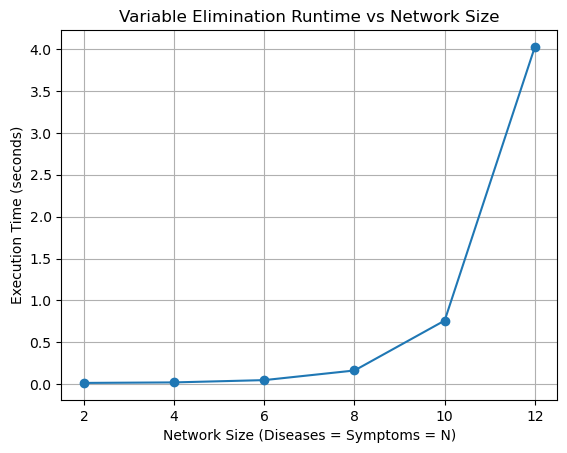

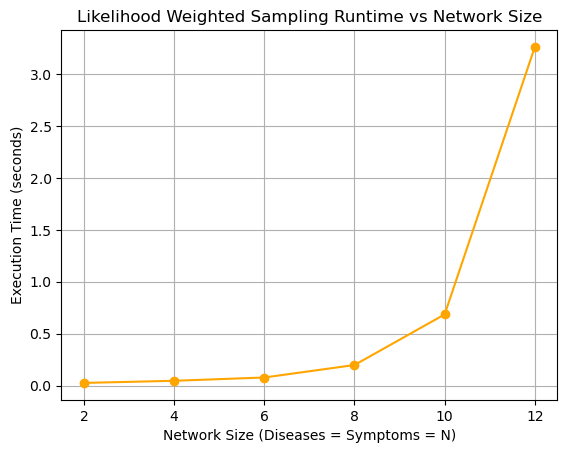

In [57]:
import matplotlib.pyplot as plt

#Network sizes to test (same number of diseases and symptoms)
network_sizes = [2, 4, 6, 8, 10, 12]

ve_times = []
lw_times = []

#Run both inference methods on each network size
for size in network_sizes:
    print(f"Running size {size}...")

    model = build_expanded_model(num_diseases=size, num_symptoms=size)

    #Variable Elimination
    try:
        _, ve_time = time_variable_elimination(model)
        ve_times.append(ve_time)
    except Exception as e:
        print(f"VE failed at size {size}: {e}")
        ve_times.append(None)

    #Likelihood Weighted Sampling
    try:
        _, lw_time = time_likelihood_weighted_sampling(model)
        lw_times.append(lw_time)
    except Exception as e:
        print(f"LW failed at size {size}: {e}")
        lw_times.append(None)

#PLOT: Variable Elimination
plt.figure()
plt.plot(network_sizes, ve_times, marker='o')
plt.title("Variable Elimination Runtime vs Network Size")
plt.xlabel("Network Size (Diseases = Symptoms = N)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()

#Likelihood Weighted Sampling
plt.figure()
plt.plot(network_sizes, lw_times, marker='o', color='orange')
plt.title("Likelihood Weighted Sampling Runtime vs Network Size")
plt.xlabel("Network Size (Diseases = Symptoms = N)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()